In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('data/items.csv')

In [5]:
df.head()

,Length(in mm),Width (in mm),Sheet Cost(in Rs.)
0,600,600,1750
1,610,460,7890
2,1050,300,2350
3,914,560,10500
4,1050,610,11500


In [6]:
df.columns

Index(['Length(in mm)', 'Width (in mm)', 'Sheet Cost(in Rs.)'], dtype='object')

In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [10]:
X_test=scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "GradientBoost": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5193.5791
- Mean Absolute Error: 4331.1162
- R2 Score: 0.7958
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5891.9425
- Mean Absolute Error: 4303.4673
- R2 Score: 0.5952


Lasso
Model performance for Training set
- Root Mean Squared Error: 5193.5792
- Mean Absolute Error: 4331.1387
- R2 Score: 0.7958
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5892.2596
- Mean Absolute Error: 4303.7611
- R2 Score: 0.5951


Ridge
Model performance for Training set
- Root Mean Squared Error: 5195.7228
- Mean Absolute Error: 4321.2632
- R2 Score: 0.7957
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5880.8586
- Mean Absolute Error: 4315.0195
- R2 Score: 0.5967


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4657.7450
- Mean Absolute Error: 2992.0074


In [14]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by="R2_score",ascending=False)

,Model Name,R2_score
4,Decision Tree,0.903109
6,XGBRegressor,0.874619
7,GradientBoost,0.862153
5,Random Forest Regressor,0.816200
8,AdaBoost Regressor,0.808160
2,Ridge,0.596688
0,Linear Regression,0.595166
1,Lasso,0.595122
3,K-Neighbors Regressor,0.550480


In [22]:
rf_params={
    "max_depth":[None,5,10,15,20],
    "max_features":[1,5,8,16],
    "min_samples_split":[1,2,4,8,16],
    "n_estimators":[100,200,500,1000]
}

ada_params={
    "n_estimators":[100,150,200,500],
    "loss":['linear', 'square', 'exponential'],
    "learning_rate":[0.1,0.01,0.001]
}

grad_params={
    "n_estimators":[100,150,200,500],
    "loss": ['squared_error','absolute_error', 'huber', 'quantile'],
    "learning_rate":[0,1,0.01],
    "min_samples_split":[1,2,4,8,16,32],
    "min_samples_leaf":[1,2,10,20]
}

xg_params={
    "learning_rate":[0.1,0.01],
    "max_depth":[5,8,12,20,30],
    "n_estimators":[100,200,300],
    "colsample_bytree":[0.5,0.8,1,0.3,0.4]
}

dt_params={
    "criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter":['best','random'],
    "max_depth":[2,4,5,10,15,25,30],
    "min_samples_split":[1,2,4,8,16,32],
    "min_samples_leaf":[1,2,10,20]
}

In [23]:
randomcv_models=[
                    ("RF",RandomForestRegressor(),rf_params),
                    ("Adaboost",AdaBoostRegressor(),ada_params),
                    ("Gradboost",GradientBoostingRegressor(),grad_params),
                    ("XGboost",XGBRegressor(),xg_params),
                    ("DecisionTree",DecisionTreeRegressor(),dt_params)
]

In [24]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"-------Best params for {model_name}----------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=20, max_features=5, min_samples_split=16, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=5, min_samples_split=16, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=16, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=16, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=16, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=5, min_samples_split=16, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/A

[CV] END ...learning_rate=0.1, loss=square, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=square, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=square, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=square, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=500; total time=   0.2s
[CV] END ...learning_rate=0.1, loss=square, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.1, loss=exponential, n_estimators=150; total time=   0.1s
[CV] END ...learning_rate=0.1, loss=square, n_estimators=200; total time=   0.1s
[CV] END learning_ra

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/A

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=12, n_estimators=200; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=30, n_estimators=300; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=30, n_estimators=300; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=300; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=300; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=300; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=12, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=100; total ti

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/A

In [25]:
models={
    "DecisionTree":DecisionTreeRegressor(splitter='random',min_samples_split=8,min_samples_leaf=2,max_depth=2,criterion='poisson'),
    "Random forest": RandomForestRegressor(n_estimators=200,min_samples_split=2,max_features=8,max_depth=None),
    "Adaboost": AdaBoostRegressor(n_estimators=150,loss='linear',learning_rate=0.01),
    "GradientBoost": GradientBoostingRegressor(n_estimators=150,min_samples_split=4,min_samples_leaf=1,loss='huber',learning_rate=1),
    "XGboost": XGBRegressor(n_estimators=100,max_depth= 8, learning_rate= 0.1, colsample_bytree= 0.3)
}
model_list = []
r2_list =[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae,model_train_mse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for training dataset')
    print("- Mean Absolute error:{:.4f}".format(model_train_mae))
    print("- Mean Squared error:{:.4f}".format(model_train_mse))
    print("-R2 score:{:.4f}".format(model_train_r2))

    print("-------------------------------------")
    print("Model performance for Test Dataset")
    print("- Mean Absolute error:{:.4f}".format(model_test_mae))
    print("- Mean Squared error:{:.4f}".format(model_test_mse))
    print("-R2 score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")

DecisionTree
Model performance for training dataset
- Mean Absolute error:4934.4560
- Mean Squared error:6304.1531
-R2 score:0.6992
-------------------------------------
Model performance for Test Dataset
- Mean Absolute error:6189.7014
- Mean Squared error:9282.1604
-R2 score:-0.0048


Random forest
Model performance for training dataset
- Mean Absolute error:1325.5571
- Mean Squared error:1990.5531
-R2 score:0.9700
-------------------------------------
Model performance for Test Dataset
- Mean Absolute error:2856.5774
- Mean Squared error:3794.8181
-R2 score:0.8321


Adaboost
Model performance for training dataset
- Mean Absolute error:2135.1169
- Mean Squared error:3016.1475
-R2 score:0.9311
-------------------------------------
Model performance for Test Dataset
- Mean Absolute error:3601.9120
- Mean Squared error:4737.8756
-R2 score:0.7382


GradientBoost
Model performance for training dataset
- Mean Absolute error:88.7037
- Mean Squared error:313.5975
-R2 score:0.9993
-----------

In [26]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by="R2_score",ascending=False)

,Model Name,R2_score
1,Random forest,0.832065
3,GradientBoost,0.763440
2,Adaboost,0.738225
4,XGboost,0.556932
0,DecisionTree,-0.004750


R2 Score:0.8093


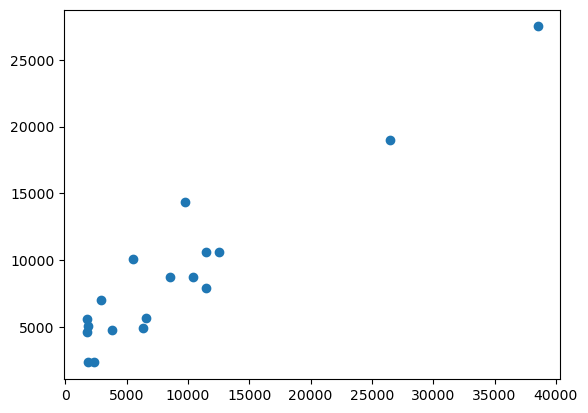

In [20]:
rf=RandomForestRegressor(n_estimators=200,min_samples_split=2,max_features=8,max_depth=None)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
score=r2_score(y_test,y_pred)
print("R2 Score:{:.4f}".format(score))
plt.scatter(y_test,y_pred)

In [21]:
pred_df=pd.DataFrame({"actual":y_test,"predicted":y_pred,"difference":y_test-y_pred})
pred_df

,actual,predicted,difference
4,11500,7929.687500,3570.312500
62,6580,5693.000000,887.000000
18,10450,8704.552738,1745.447262
0,1750,5583.600000,-3833.600000
28,26500,18961.505000,7538.495000
50,6350,4899.450000,1450.550000
10,9760,14385.526429,-4625.526429
34,12500,10618.392500,1881.607500
12,1850,5087.350000,-3237.350000
54,1850,2338.500000,-488.500000
